In [ ]:
from sklearn import datasets  # for importing the examples
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # for visualisation
from sklearn.model_selection import train_test_split  # for spliting data
from sklearn.ensemble import RandomForestClassifier  # for random forest classifier
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/city_lifestyle_dataset.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['country'])

In [ ]:
X = df.drop(columns=['city_name', 'country'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_samples=0.5, random_state=42,oob_score=True,max_features='sqrt')

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.5, oob_score=True, random_state=42)

In [ ]:
rfc.oob_score_

0.7833333333333333

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:

from sklearn.metrics import accuracy_score
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred) # Instead of r2 in regression , we use accuracy_score


0.75

In [ ]:


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 7  0  0  0  0  0]
 [ 0 16  0  0  0  0]
 [ 0  1  6  2  3  0]
 [ 0  0  3  5  1  1]
 [ 0  0  0  2  5  0]
 [ 0  2  0  0  0  6]]


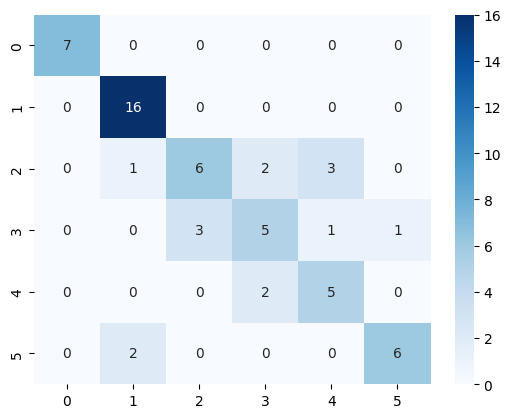

In [ ]:


sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()
